<h1> Technical Studies Workshop <h1>

<h2> Introduction <h2>

This notebook will help you apply some knowledge of your maths and physics to calculate how a car accelerates.

You can run blocks of code by clicking the arrow next to it. Do not change anything in the code.

You can start by running the block called "imports" before you move on to the exercises.

Don't worry if you run into any issues at any point, just reach out!

Good luck!

In [ ]:
#@title Imports
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from matplotlib import rc
import math

rc('animation', embed_limit=100)

<h3> Exercise One <h3>
Starting from rest, how fast must you accelerate to reach 100 km/h (27.78 m/s)  in 20 seconds? Give your answers in m/s²

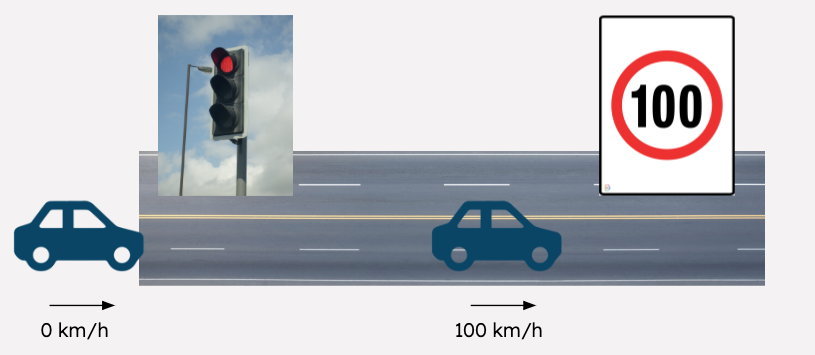

In [ ]:
required_acceleration = # m/s²

Got an answer? Run the following simulation to get the velocity-time graph of your answer!

In [ ]:
#@title Exercise 1 Check
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

# Parameters (adjustable)
initial_speed = 0  # m/s (starts from rest)
acceleration = required_acceleration  # m/s^2 (constant acceleration)
total_time = 20  # seconds, total duration of the simulation
time_step = 0.1  # Time step for numerical simulation

# Simulated motion using numerical integration
time_points = np.arange(0, total_time, time_step)
positions = [0]
velocities = [initial_speed]

for t in time_points[1:]:
    new_velocity = velocities[-1] + acceleration * time_step
    new_position = positions[-1] + velocities[-1] * time_step + 0.5 * acceleration * time_step**2
    velocities.append(new_velocity)
    positions.append(new_position)

positions = np.array(positions)
velocities = np.array(velocities)

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Top view (ax 0)
ax_top = axs[0]
road_length = positions[-1] + 10  # Extend road length slightly beyond the car's max position
ax_top.set_xlim(0, road_length)
ax_top.set_ylim(-5, 5)
ax_top.set_aspect('equal')
ax_top.axis('off')

# Draw the road with two lanes
road_top = plt.Rectangle((0, -4), road_length, 8, color='gray', alpha=0.5)
ax_top.add_patch(road_top)

# Draw lane markings
for x in np.arange(0, road_length, 5):  # Dashed lines every 5 units
    ax_top.plot([x, x + 2], [0, 0], color='white', linewidth=2, zorder=1)

# Car representation (top view) as a larger blue rectangle
car_width = 13  # Width of the car in the top view
car_height = 4  # Height of the car in the top view (reduced to fit lanes better)
car_top = plt.Rectangle((0, -2.5), car_width, car_height, color='blue', zorder=2)  # Positioned in the right lane
ax_top.add_patch(car_top)

# Set title for the top view
ax_top.set_title("Top View (Two-Lane Highway)")

# Velocity vs. Time plot (ax 1)
ax_velocity = axs[1]
ax_velocity.set_xlim(0, total_time)
ax_velocity.set_ylim(0, velocities[-1] + 2)
ax_velocity.set_xlabel('Time (s)')
ax_velocity.set_ylabel('Velocity (m/s)')
ax_velocity.grid(True)

# Velocity plot line
velocity_line, = ax_velocity.plot([], [], 'b-', lw=2)

# Set title for the velocity vs. time plot
ax_velocity.set_title("Velocity vs. Time")

# Initialization function
def init():
    car_top.set_xy((0, -2.5))  # Reset car position in the right lane
    velocity_line.set_data([], [])
    return car_top, velocity_line

# Animation update function
def update(frame):
    x = positions[frame]
    v = velocities[frame]

    # Update car position (top view)
    car_top.set_x(x)

    # Update velocity plot
    velocity_line.set_data(time_points[:frame + 1], velocities[:frame + 1])

    return car_top, velocity_line

final_velocity_ms = velocities[-1]
final_velocity_kmh = final_velocity_ms * 3.6  # Convert to km/h

# Create animation
ani = FuncAnimation(fig, update, frames=len(time_points), init_func=init, blit=True, interval=20, repeat=False)
HTML(ani.to_jshtml())


Run following code to get the final velocity after 20 seconds. Is your response correct?

In [ ]:
#@title Run following code to get the final velocity after 20 seconds. Is your response correct?
# print(f"Final velocity (m/s): {final_velocity_ms:.1f}")
print(f"Final velocity, rounded to integer: {final_velocity_kmh:.0f} km/h")


<h3> Exercise 2 <h3>

How much distance did the car travel in total in 20 seconds?

Fill in the answer below.

In [ ]:
total_distance = # m

Now run the following code to check your answer. The red dot in the second diagram shows what you calculated the total distance to be. If your answer is correct, the distance-time graph should end at the red dot exactly.

In [ ]:
#@title Exercise 2 Check
# def exercise_two(total_distance):
%matplotlib notebook

# Parameters (adjustable)
initial_speed = 0  # m/s (starts from rest)
acceleration = required_acceleration  # m/s^2 (constant acceleration)
total_time = 20  # seconds, total duration of the simulation
time_step = 0.1  # Simulation time step in seconds

# Initialize lists for time, velocity, and position
time_points = [0]
velocities = [initial_speed]
positions = [0]

# Simulate motion iteratively
while time_points[-1] < total_time:
    t = time_points[-1] + time_step
    v = velocities[-1] + acceleration * time_step
    d = positions[-1] + velocities[-1] * time_step + 0.5 * acceleration * time_step**2

    time_points.append(t)
    velocities.append(v)
    positions.append(d)

# Convert lists to numpy arrays
time_points = np.array(time_points)
velocities = np.array(velocities)
positions = np.array(positions)

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 6))  # Two subplots, one for velocity and one for distance

# Velocity vs. Time plot (ax 0)
ax_velocity = axs[0]
ax_velocity.set_xlim(0, total_time + 2)  # Extend x-axis by 2 seconds beyond the last time point
ax_velocity.set_ylim(-1, max(velocities) + 1)
ax_velocity.set_xlabel('Time (s)')
ax_velocity.set_ylabel('Velocity (m/s)')
ax_velocity.grid(True)
velocity_line, = ax_velocity.plot([], [], 'b-', lw=2)
ax_velocity.set_title("Velocity vs. Time")

# Distance vs. Time plot (ax 1)
ax_distance = axs[1]
ax_distance.set_xlim(-1, total_time + 1)  # Extend x-axis by 2 seconds beyond the last time point
ax_distance.set_ylim(0, max(positions) + 10)
ax_distance.set_xlabel('Time (s)')
ax_distance.set_ylabel('Distance (m)')
ax_distance.grid(True)
distance_line, = ax_distance.plot([], [], 'g-', lw=2)
ax_distance.set_title("Distance vs. Time")

# Add a point at t = 20 seconds on the distance graph
distance_at_t = total_distance
ax_distance.plot(total_time, distance_at_t, 'ro')  # Plot a red point at (total_time, distance_at_t)

# Add more vertical space between the plots
plt.subplots_adjust(hspace=0.4)

# Initialization function
def init():
    velocity_line.set_data([], [])
    distance_line.set_data([], [])
    return velocity_line, distance_line

# Animation update function
def update(frame):
    velocity_line.set_data(time_points[:frame + 1], velocities[:frame + 1])
    distance_line.set_data(time_points[:frame + 1], positions[:frame + 1])
    return velocity_line, distance_line

# Create animation
ani = FuncAnimation(fig, update, frames=len(time_points), init_func=init, blit=True, interval=50, repeat=False)

# Display the animation
HTML(ani.to_jshtml())


<h3> Exercise Three <h3>

Let's say the car accelerated from rest with a constant acceleration for 20 seconds and covered 500 meters in total. What was the car's acceleration?

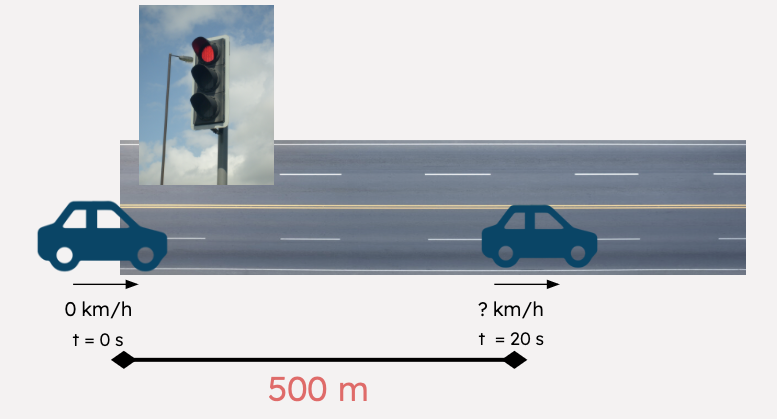

In [ ]:
acceleration_car = # m/s²

Now run the next block to check if your answer is correct. If the distance-time graph ends with the green dot, you are correct!

In [ ]:
#@title Exercise three check
initial_speed = 0  # m/s (starts from rest)
acceleration = acceleration_car  # m/s^2 (constant acceleration)
total_time = 20  # seconds, total duration of the simulation
distance_at_t = 500 # meters, distance after 20 seconds
dt = 0.1  # Time step for the simulation

# Initialize lists for position and velocity
time_points = np.arange(0, total_time, dt)
positions = [0]
velocities = [initial_speed]

# Simulate motion using a loop
for t in time_points[1:]:
    new_velocity = velocities[-1] + acceleration * dt
    new_position = positions[-1] + velocities[-1] * dt + 0.5 * acceleration * dt**2

    velocities.append(new_velocity)
    positions.append(new_position)

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 6))  # Two subplots, one for velocity and one for distance

# Velocity vs. Time plot (ax 0)
ax_velocity = axs[0]
ax_velocity.set_xlim(-1, total_time + 1)  # Extend x-axis by 2 seconds beyond the last time point
ax_velocity.set_ylim(0, max(velocities) + 20)
ax_velocity.set_xlabel('Time (s)')
ax_velocity.set_ylabel('Velocity (m/s)')
ax_velocity.grid(True)
velocity_line, = ax_velocity.plot([], [], 'b-', lw=2)
ax_velocity.set_title("Velocity vs. Time")

# Distance vs. Time plot (ax 1)
ax_distance = axs[1]
ax_distance.set_xlim(-1, total_time + 1)  # Extend x-axis by 2 seconds beyond the last time point
ax_distance.set_ylim(0, max(positions[-1], distance_at_t) + 20)
ax_distance.set_xlabel('Time (s)')
ax_distance.set_ylabel('Distance (m)')
ax_distance.grid(True)
distance_line, = ax_distance.plot([], [], 'g-', lw=2)
ax_distance.set_title("Distance vs. Time")

# Add a point at t = 20 seconds on the distance graph
ax_distance.plot(total_time, distance_at_t, 'go')  # Plot a red point at (t_point, distance_at_t)

# Add more vertical space between the plots
plt.subplots_adjust(hspace=0.4)

# Initialization function
def init():
    velocity_line.set_data([], [])
    distance_line.set_data([], [])
    return velocity_line, distance_line

# Animation update function
def update(frame):
    velocity_line.set_data(time_points[:frame + 1], velocities[:frame + 1])
    distance_line.set_data(time_points[:frame + 1], positions[:frame + 1])
    return velocity_line, distance_line

# Create animation
ani = FuncAnimation(fig, update, frames=len(time_points), init_func=init, blit=True, interval=50, repeat = False)

# Display the animation
HTML(ani.to_jshtml())
